<a href="https://colab.research.google.com/github/atusharkm/hello-world/blob/master/FinBTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lazypredict

     |████████████████████████████████| 6.8 MB 10.9 MB/s 
     |████████████████████████████████| 269 kB 71.1 MB/s 
     |████████████████████████████████| 248 kB 53.6 MB/s 
     |████████████████████████████████| 302 kB 80.4 MB/s 
     |████████████████████████████████| 72 kB 797 kB/s 
     |████████████████████████████████| 1.2 MB 69.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.1 kB/s 
     |████████████████████████████████| 127.6 MB 7.2 kB/s 
     |████████████████████████████████| 14.5 MB 8.3 kB/s 
     |████████████████████████████████| 10.1 MB 37.4 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44635 sha256=f2a9852b282fd5f7c23128dc770b17f75d847dc1a2fe7fe7ece9a3d3e8fc4a94
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully 

In [1]:
import lazypredict

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
df=pd.read_csv('Nu Data BTP - Sheet2.csv')

In [7]:
df.head()

,TF,Re,TL_OUT,TU_OUT,Tb,Tb_max,PL_in,PL_out,PU_in,PU_out,hi,wc,ho,Dhi,Dho,Dh_m,vin,del_PL,del_PU,del_p,Rth,T_mean,h_mean,f,Nu
0,0.26,200,297.44,295.19,302.45,303.53,41208.00,216.97,41208.00,215.59,833.33,100,216.67,178.57,136.84,157.71,1.13,40991.03,40992.41,40991.72,0.10,294.73,129575.64,0.26,34.06
1,0.28,200,297.49,295.22,302.50,303.58,38459.00,189.69,38458.00,188.56,820.31,100,229.69,178.27,139.34,158.80,1.13,38269.31,38269.44,38269.38,0.10,294.75,129073.89,0.24,34.16
2,0.30,200,297.55,295.25,302.54,303.63,36143.00,167.35,36143.00,167.49,807.69,100,242.31,177.97,141.57,159.77,1.13,35975.65,35975.51,35975.58,0.10,294.77,128783.00,0.23,34.29
3,0.32,200,297.60,295.29,302.59,303.68,34168.00,148.95,34167.00,149.05,795.45,100,254.55,177.66,143.59,160.63,1.13,34019.05,34017.95,34018.50,0.11,294.80,128328.52,0.21,34.36
4,0.34,200,297.65,295.32,302.63,303.72,32462.00,133.97,32461.00,133.73,783.58,100,266.42,177.36,145.42,161.39,1.13,32328.03,32327.27,32327.65,0.11,294.82,128000.00,0.20,34.43


In [8]:
df.describe()

,TF,Re,TL_OUT,TU_OUT,Tb,Tb_max,PL_in,PL_out,PU_in,PU_out,hi,wc,ho,Dhi,Dho,Dh_m,vin,del_PL,del_PU,del_p,Rth,T_mean,h_mean,f,Nu
count,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00
mean,0.68,325.81,303.12,300.61,309.43,312.06,44912.68,198.75,44912.42,198.45,640.37,100.00,409.63,172.53,159.01,165.77,1.89,44720.94,44721.93,44721.44,0.19,297.51,122552.68,0.25,33.79
std,0.24,190.58,18.94,17.83,24.05,29.23,37543.51,278.58,37543.45,278.02,98.66,0.00,98.66,3.46,9.18,2.94,1.10,37298.08,37301.72,37299.90,0.29,9.19,35445.34,0.48,9.64
min,0.26,10.00,295.04,293.81,300.09,300.89,774.81,0.79,774.81,0.79,525.00,100.00,216.67,168.00,136.84,157.71,0.06,774.02,774.02,774.02,0.08,293.79,14233.47,0.03,3.99
25%,0.44,200.00,295.83,294.20,301.03,302.04,17133.03,32.40,17133.00,32.42,558.51,100.00,320.83,169.63,152.48,164.18,1.14,17100.63,17100.58,17100.61,0.09,294.08,120123.86,0.06,33.61
50%,0.76,300.00,296.64,294.68,301.82,302.88,37655.00,101.88,37654.00,101.29,596.59,100.00,453.41,171.29,163.86,167.57,1.78,37533.75,37532.61,37533.18,0.10,294.40,134803.89,0.10,36.97
75%,0.88,500.00,298.76,296.09,303.61,304.87,60771.29,235.04,60770.60,234.61,729.17,100.00,491.49,175.88,166.19,167.91,2.87,60523.45,60522.79,60523.12,0.12,295.29,144041.52,0.18,39.64
max,1.00,600.00,375.72,369.71,403.19,425.64,193000.00,1765.50,193000.00,1759.90,833.33,100.00,525.00,178.57,168.00,168.00,3.59,191454.50,191530.10,191492.30,1.32,332.93,158667.20,2.14,42.02


In [9]:
corr=df.corr()

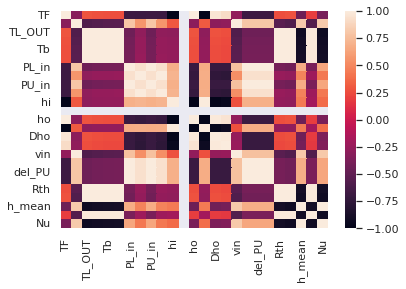

In [10]:
sns.set()
sns.heatmap(corr)

In [11]:
print(corr)

          TF    Re  TL_OUT  TU_OUT    Tb  ...   Rth  T_mean  h_mean     f    Nu
TF      1.00 -0.31    0.29    0.27  0.26  ...  0.26    0.28   -0.44  0.19 -0.38
Re     -0.31  1.00   -0.59   -0.56 -0.54  ... -0.54   -0.57    0.82 -0.57  0.82
TL_OUT  0.29 -0.59    1.00    1.00  1.00  ...  1.00    1.00   -0.92  0.99 -0.93
TU_OUT  0.27 -0.56    1.00    1.00  1.00  ...  1.00    1.00   -0.90  0.99 -0.91
Tb      0.26 -0.54    1.00    1.00  1.00  ...  1.00    1.00   -0.89  0.99 -0.90
Tb_max  0.26 -0.54    1.00    1.00  1.00  ...  1.00    1.00   -0.89  0.99 -0.90
PL_in  -0.67  0.80   -0.43   -0.41 -0.40  ... -0.40   -0.42    0.68 -0.38  0.64
PL_out -0.68  0.57   -0.27   -0.25 -0.25  ... -0.25   -0.26    0.48 -0.22  0.43
PU_in  -0.67  0.80   -0.43   -0.41 -0.40  ... -0.40   -0.42    0.68 -0.38  0.64
PU_out -0.68  0.57   -0.27   -0.25 -0.25  ... -0.25   -0.26    0.48 -0.22  0.43
hi     -0.99  0.30   -0.29   -0.27 -0.26  ... -0.26   -0.28    0.44 -0.19  0.38
wc       nan   nan     nan     nan   nan

In [14]:
X = df[df.columns[range(23)]]
y=df['Nu']
z=df['f']

In [15]:
print(X)

      TF   Re  TL_OUT  TU_OUT     Tb  ...   del_PU    del_p  Rth  T_mean    h_mean
0   0.26  200  297.44  295.19 302.45  ... 40992.41 40991.72 0.10  294.73 129575.64
1   0.28  200  297.49  295.22 302.50  ... 38269.44 38269.38 0.10  294.75 129073.89
2   0.30  200  297.55  295.25 302.54  ... 35975.51 35975.58 0.10  294.77 128783.00
3   0.32  200  297.60  295.29 302.59  ... 34017.95 34018.50 0.11  294.80 128328.52
4   0.34  200  297.65  295.32 302.63  ... 32327.27 32327.65 0.11  294.82 128000.00
..   ...  ...     ...     ...    ...  ...      ...      ...  ...     ...       ...
186 0.82  200  298.66  296.02 303.53  ... 17682.60 17682.58 0.12  295.25 120694.79
187 0.82  300  297.25  295.06 302.38  ... 27277.70 27277.70 0.10  294.65 129409.98
188 0.82  400  296.50  294.59 301.71  ... 37372.16 37372.14 0.10  294.35 135827.87
189 0.82  500  296.02  294.31 301.24  ... 47963.45 47963.51 0.09  294.16 141137.73
190 0.82  600  295.69  294.12 300.89  ... 59041.63 59041.62 0.09  294.03 145740.29

[19

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.15,random_state =56)

reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:02<00:00, 19.06it/s]

                               Adjusted R-Squared  ...  Time Taken
Model                                              ...            
RANSACRegressor                              1.00  ...        0.03
LinearRegression                             1.00  ...        0.01
TransformedTargetRegressor                   1.00  ...        0.01
BayesianRidge                                1.00  ...        0.01
LassoLarsCV                                  1.00  ...        0.06
HuberRegressor                               1.00  ...        0.04
OrthogonalMatchingPursuitCV                  1.00  ...        0.02
LinearSVR                                    1.00  ...        0.03
LassoCV                                      1.00  ...        0.06
RidgeCV                                      1.00  ...        0.01
ExtraTreesRegressor                          1.00  ...        0.15
OrthogonalMatchingPursuit                    1.00  ...        0.01
PassiveAggressiveRegressor                   1.00  ...        

In [17]:
print(predictions)

    AdaBoostRegressor  BaggingRegressor  ...  XGBRegressor  LGBMRegressor
0               36.38             36.14  ...         36.11          36.36
1               38.44             38.91  ...         38.94          38.87
2               40.07             39.64  ...         39.32          40.22
3               40.07             39.79  ...         39.32          40.22
4               33.79             34.45  ...         34.44          34.10
5               38.44             38.91  ...         38.93          38.96
6               36.38             36.30  ...         36.44          36.43
7               40.39             40.49  ...         40.50          40.49
8               36.79             37.17  ...         36.50          36.98
9               34.62             35.08  ...         34.18          33.69
10              40.07             40.33  ...         40.33          39.74
11              40.62             40.64  ...         40.70          40.85
12              33.75             33.3

In [23]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RANSACRegressor,1.00,1.00,0.01,0.03
LinearRegression,1.00,1.00,0.01,0.01
TransformedTargetRegressor,1.00,1.00,0.01,0.01
BayesianRidge,1.00,1.00,0.01,0.01
LassoLarsCV,1.00,1.00,0.02,0.06
HuberRegressor,1.00,1.00,0.02,0.04
OrthogonalMatchingPursuitCV,1.00,1.00,0.02,0.02
LinearSVR,1.00,1.00,0.02,0.03
LassoCV,1.00,1.00,0.03,0.06


In [ ]:
#Lazy Regression Completed

In [ ]:
#Feature Selection and Importance

In [26]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_importance

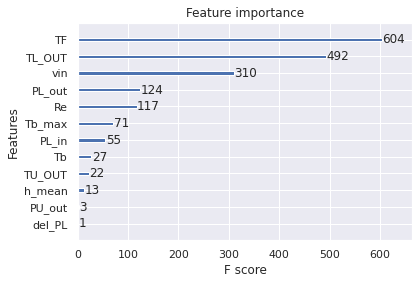

In [27]:
# fit model no training data
model = XGBRegressor()
model.fit(X, y)

# plot feature importance
plot_importance(model)
plt.show()